# Spring Pendulum

In the last lectures, we have explored the use the **scipy** module **odeint** to do the work of solving differential equations for us. We have studied coupled pendula and explored the details of the solutions. This time we have two more projects ahead of us. We first want to consider the motion of a spring pendulum and then come from that to the motion of planets. Both are examples where we have not only a tangential accelaration but also a radial component. Otherwise, these problems do look similar than the ones we considered before.


In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 


## Physical Model

The image below shows the situation we would like to cover in our second project. This is also a kind of coupled pendula, however, the situation is more subtle. We have a single spring which is mounted to a support and a mass. The spring can be elongated in length but also in angle so that you finally have a pendulum and a spring. Both motions are coupled now in a similar way as for the coupled pendula we treated. This time, however, the length change of the spring modulates the frequency of the pendulum. 

![Figure 1](SpringPendulum.png)

### Equations of motion


A mass $m$ is attached to a spring with spring constant $k$, which is attached to a support point as shown in the figure. The length of the resulting pendulum at any given time is the spring rest length $L_0$ plus the stretch (or compression) $L$, and the angle of the pendulum with respect to the vertical is $\theta$. 

The differential equations for this system are given by

\begin{eqnarray}
\ddot{L}&=&(L_0+L)\dot{\theta}^2-\frac{k}{m}L+g\cos(\theta)\\
\ddot{\theta}&=&-\frac{1}{L_0+L}[g\sin(\theta)+2\dot{L}\dot{\theta}]
\end{eqnarray}

Write a program that plots the motion of the mass for some initial $\theta\neq0$. Explore different solutions.

In [10]:
# this defines the equation of motions

def spring_pendulum(state, time ): 
    g0 = state[1]
    g1 = (L_o+state[0])*state[3]*state[3] - k/m*state[0] + gravity*np.cos(state[2]) 
    g2 = state[3]
    g3 = -(gravity*np.sin(state[2]) + 2.0*state[1]*state[3])/(L_o + state[0])
    return np.array([g0, g1, g2, g3]) 

## Numerical Solution

### Initial parameters

In [11]:
# mass m1, m2, length of pendula L1, L2, position of the coupling, spring constant k, gravitational acceleration

N = 10000
state = np.zeros ([4])
L_o = 4.9
L = 0.1
v_o = 0.1
theta_o = 0.1
omega_o = 0.1


state[0]=L 
state[1]=v_o 
state[2] = theta_o 
state[3] = omega_o

time = np.linspace(0, 500, N)
    
k = 1 # spring constant 
m = 1 # mass
gravity = 9.8

### Solution

In [19]:
answer = odeint ( spring_pendulum , state , time )

xdata = ( L_o + answer[:,0])*np.sin(answer[:,2]) 
ydata = -(L_o + answer[:,0])*np.cos(answer[:,2])

### Plotting

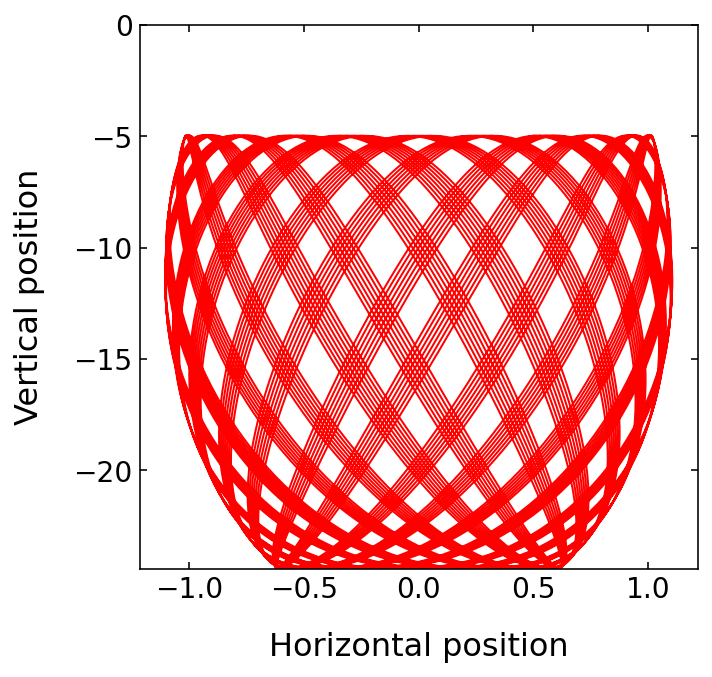

In [20]:
fig=plt.figure(1, figsize = (5,5) )
plt.plot(xdata,ydata, 'r-') 
plt.xlabel('Horizontal position',fontsize=16)
plt.ylabel('Vertical position',fontsize=16) 
plt.tick_params(labelsize=14)
plt.ylim(ydata.min(),0)
#plt.xlim(ydata.min(),-ydata.min())
plt.show()

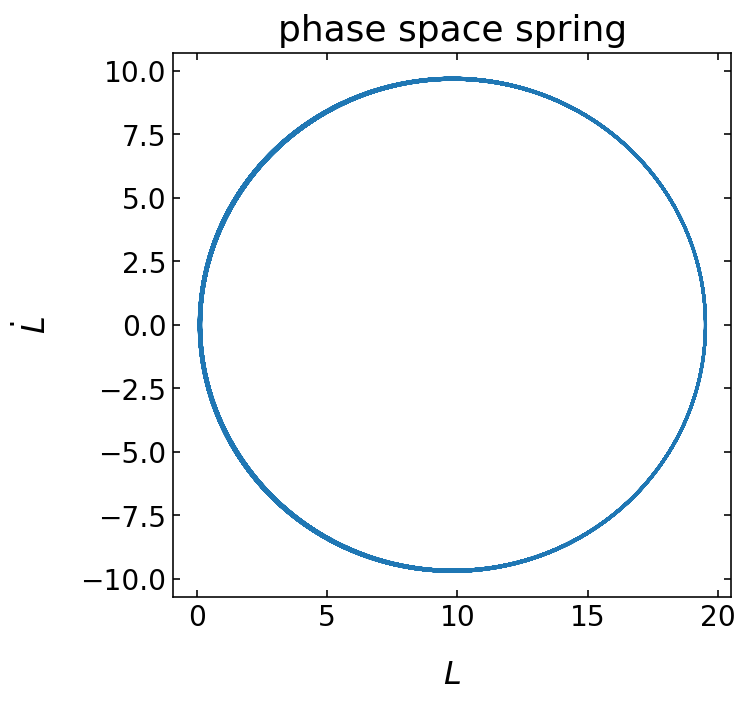

In [21]:
fig=plt.figure(1, figsize = (5,5) )
plt.plot(answer[:,0],answer[:,1])
plt.xlabel('$L$',fontsize=16)
plt.ylabel('$\dot{L}$',fontsize=16) 
plt.title('phase space spring')
plt.tick_params(labelsize=14)
plt.show()

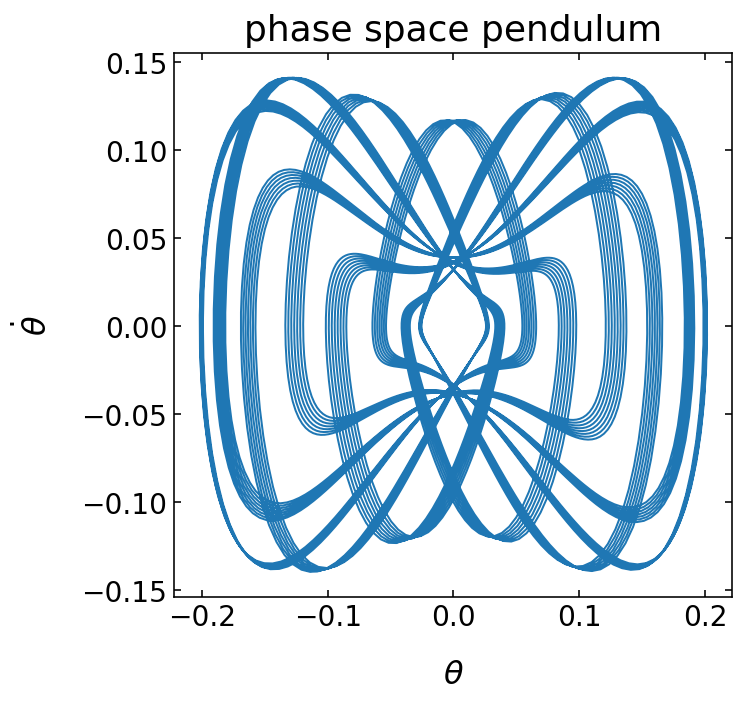

In [15]:
fig=plt.figure(1, figsize = (5,5) )
plt.plot(answer[:,2],answer[:,3])
plt.xlabel(r'$\theta$',fontsize=16)
plt.ylabel(r'$\dot{\theta}$',fontsize=16) 
plt.title('phase space pendulum')
plt.tick_params(labelsize=14)
plt.show()

#### Angle and Length over Time

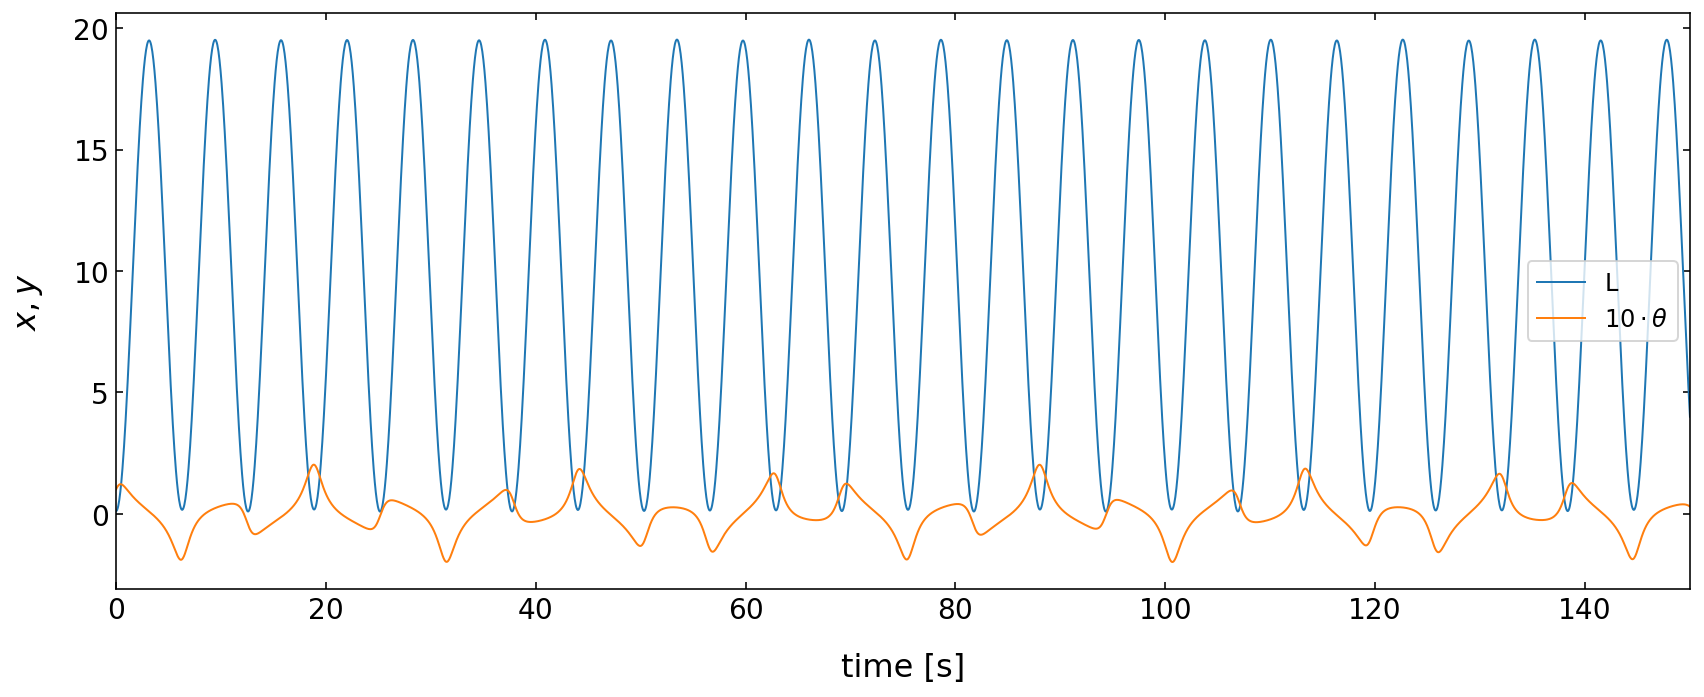

In [18]:
# plot the angle of the spring as a function of time

plt.figure(figsize=(12,5))
plt.xlabel('time [s]', fontsize=16)
plt.ylabel(r'$x,y$',fontsize=16)
plt.tick_params(labelsize=14)
plt.plot(time,answer[:,0],label=r'L')
plt.plot(time,answer[:,2]*10,label=r'$10\cdot \theta$')
plt.tight_layout()  
plt.legend()
plt.xlim(0,150)
plt.show()